In [77]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [78]:
import lazy_pipeline as lpipe

In [79]:
from platform import python_version
import sklearn
print(python_version())
print(lpipe.pd.__version__)
print(sklearn.__version__)

3.10.0
1.5.2
1.2.0


## EDA

importing data

In [80]:
import pandas as pd
import seaborn as sns
import plotly.express as px
sns.set(style="darkgrid")
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [81]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [82]:
df.shape

(918, 12)

null or missing values

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [84]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

type of the features

In [85]:
df_num_cols = df.select_dtypes(exclude='object').columns.to_list()
df_cat_cols = df.select_dtypes(include='object').columns.to_list()

In [86]:
df_cat_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

numerical features

In [87]:
df[df_num_cols].iplot(kind='histogram',subplots=True)

short exploration of target feature

In [88]:
df["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [89]:
fig = px.histogram(df, x='Age', color='HeartDisease', template='plotly_dark')

fig.show()

подготовка в бинаризации

In [90]:
df_num_cols

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [91]:
df[df_num_cols].describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Binarization

Age

labels:

- 18-44 = young_age
- 45-59 = middle_age
- 60-74 = old_age
- 75-90 = pre_longtimer_age
- 90-inf = longevity_age

In [92]:
for x in df["Age"]:
    if x <= 44:
        df["Age"] = df["Age"].replace(x,"young_age")
    elif x <= 59:
        df["Age"] = df["Age"].replace(x,"middle_age")
    elif x <= 74:
        df["Age"] = df["Age"].replace(x,"old_age")
    elif x <= 90:
        df["Age"] = df["Age"].replace(x,"pre_longtimer_age")
    else:
        df["Age"] = df["Age"].replace(x,"longevity_age")

In [93]:
df["Age"].value_counts()

middle_age           487
old_age              246
young_age            178
pre_longtimer_age      7
Name: Age, dtype: int64

In [94]:
for x in df["RestingBP"]:
    if x <= 120:
        df["RestingBP"] = df["RestingBP"].replace(x,"normal")
    elif x <= 129:
        df["RestingBP"] = df["RestingBP"].replace(x,"elevated")
    elif x <= 139:
        df["RestingBP"] = df["RestingBP"].replace(x,"hypertension_s1")
    elif x <= 179:
        df["RestingBP"] = df["RestingBP"].replace(x,"hypertension_s2")
    else:
        df["RestingBP"] = df["RestingBP"].replace(x,"hypertensive_crisis")

In [95]:
df["RestingBP"].value_counts()

hypertension_s2        307
normal                 293
hypertension_s1        216
elevated                82
hypertensive_crisis     20
Name: RestingBP, dtype: int64

Cholesterol

In [96]:
for x in df["Cholesterol"]:
    if x <= 200:
        df["Cholesterol"] = df["Cholesterol"].replace(x,"normal")
    elif x <= 239:
        df["Cholesterol"] = df["Cholesterol"].replace(x,"dorderline_high")
    else:
        df["Cholesterol"] = df["Cholesterol"].replace(x,"high")

In [97]:
df["Cholesterol"].value_counts()

high               363
normal             322
dorderline_high    233
Name: Cholesterol, dtype: int64

FastingBS

In [98]:
df["FastingBS"] = df["FastingBS"].astype(bool)

In [99]:
df["FastingBS"].value_counts()

False    704
True     214
Name: FastingBS, dtype: int64

MaxHR

<AxesSubplot: >

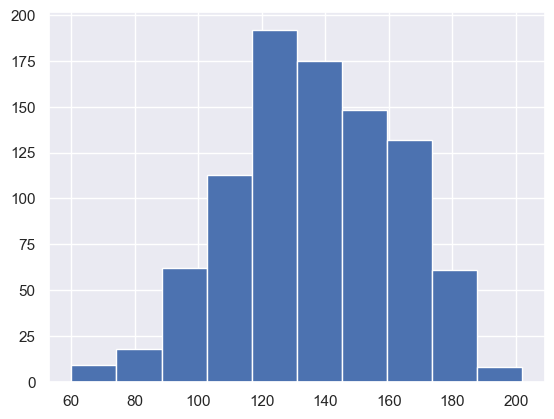

In [100]:
df["MaxHR"].hist()

In [101]:
for x in df["MaxHR"]:
    if x <= 138:
        df["MaxHR"] = df["MaxHR"].replace(x,"normal")
    else:
        df["MaxHR"] = df["MaxHR"].replace(x,"dangerous")

In [102]:
df["MaxHR"].value_counts()

normal       465
dangerous    453
Name: MaxHR, dtype: int64

Oldpeak

<AxesSubplot: >

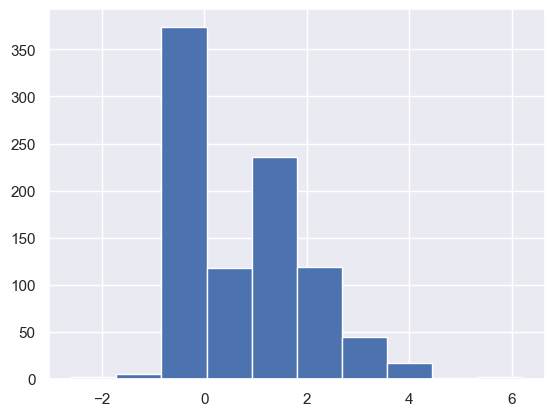

In [103]:
df["Oldpeak"].hist()

In [104]:
for x in df["Oldpeak"]:
    if x <= 0.5:
        df["Oldpeak"] = df["Oldpeak"].replace(x,"normal")
    else:
        df["Oldpeak"] = df["Oldpeak"].replace(x,"pathological")

In [105]:
df["Oldpeak"].value_counts()

pathological    460
normal          458
Name: Oldpeak, dtype: int64

HeartDisease

In [106]:
df["HeartDisease"] = df["HeartDisease"].astype(bool)

In [107]:
df["HeartDisease"].value_counts()

True     508
False    410
Name: HeartDisease, dtype: int64

---

Modeling

In [108]:
y_name= "HeartDisease"

In [109]:
y = df[y_name]

In [110]:
X = lpipe.binarize_X(df.drop(y_name, axis=1))
print(X.shape)
X.head()

(918, 32)


,Age: middle_age,Age: old_age,Age: pre_longtimer_age,Age: young_age,Sex: F,Sex: M,ChestPainType: ASY,ChestPainType: ATA,ChestPainType: NAP,ChestPainType: TA,...,RestingECG: ST,MaxHR: dangerous,MaxHR: normal,ExerciseAngina: N,ExerciseAngina: Y,Oldpeak: normal,Oldpeak: pathological,ST_Slope: Down,ST_Slope: Flat,ST_Slope: Up
0,False,False,False,True,False,True,False,True,False,False,...,False,True,False,True,False,True,False,False,False,True
1,True,False,False,False,True,False,False,False,True,False,...,False,True,False,True,False,False,True,False,True,False
2,False,False,False,True,False,True,False,True,False,False,...,True,False,True,True,False,True,False,False,False,True
3,True,False,False,False,True,False,True,False,False,False,...,False,False,True,False,True,False,True,False,True,False
4,True,False,False,False,False,True,False,False,True,False,...,False,False,True,True,False,True,False,False,False,True


In [111]:
X = X.sample(frac=1, random_state=42)  # Shuffle X
y = y[X.index]  # Order y to follow the order of rows from X

In [112]:
X

,Age: middle_age,Age: old_age,Age: pre_longtimer_age,Age: young_age,Sex: F,Sex: M,ChestPainType: ASY,ChestPainType: ATA,ChestPainType: NAP,ChestPainType: TA,...,RestingECG: ST,MaxHR: dangerous,MaxHR: normal,ExerciseAngina: N,ExerciseAngina: Y,Oldpeak: normal,Oldpeak: pathological,ST_Slope: Down,ST_Slope: Flat,ST_Slope: Up
668,False,True,False,False,True,False,False,True,False,False,...,False,True,False,True,False,True,False,False,False,True
30,True,False,False,False,False,True,False,False,True,False,...,False,False,True,True,False,True,False,False,True,False
377,False,True,False,False,False,True,True,False,False,False,...,True,False,True,True,False,False,True,False,True,False
535,True,False,False,False,False,True,True,False,False,False,...,False,False,True,False,True,False,True,False,True,False
807,True,False,False,False,False,True,False,True,False,False,...,False,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,True,False,False,False,True,False,True,False,False,False,...,True,False,True,True,False,True,False,False,False,True
270,True,False,False,False,False,True,True,False,False,False,...,False,True,False,True,False,True,False,False,False,True
860,False,True,False,False,False,True,True,False,False,False,...,False,True,False,False,True,False,True,False,False,True
435,False,True,False,False,False,True,True,False,False,False,...,True,False,True,False,True,True,False,False,False,True


In [113]:
X_bin = [set(X.columns[x]) for idx, x in X.iterrows()]
X_bin[0]

{'Age: old_age',
 'ChestPainType: ATA',
 'Cholesterol: normal',
 'ExerciseAngina: N',
 'FastingBS: False',
 'MaxHR: dangerous',
 'Oldpeak: normal',
 'RestingBP: hypertension_s2',
 'RestingECG: Normal',
 'ST_Slope: Up',
 'Sex: F'}

In [114]:
y = y.values.tolist()

In [115]:
n_train = int(len(X)*0.1)
n_test = len(X) - n_train
n_train, n_test

(91, 827)

In [116]:
y_test = y[n_train:]

---

Make prediction

In [117]:
%%time
gen = lpipe.predict_array(X_bin, y, n_train, use_tqdm=True)
y_preds, t_preds = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|██████████| 918/918 [00:27<00:00, 29.76it/s] 

CPU times: user 26.9 s, sys: 556 ms, total: 27.4 s
Wall time: 27.8 s


In [118]:
%%time
gen = list(lpipe.predict_array(X_bin, y, n_train, use_tqdm=True, update_train=False))
y_preds_fixedtrain, t_preds_fixedtrain = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|██████████| 918/918 [00:00<00:00, 1085.47it/s]

CPU times: user 727 ms, sys: 16.1 ms, total: 743 ms
Wall time: 765 ms


__Random__

In [119]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    random_state=42,
    oob_score=True,
    class_weight="balanced",
)

parameters = {
    "max_features": [1, 2, 4],
    "min_samples_leaf": [3, 5, 7, 9],
    "max_depth": [5, 10, 15],
}

rf_cv = GridSearchCV(rf, parameters, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
#
rf_cv.fit(X, y)
best_forest = rf_cv.best_estimator_
best_forest.fit(X[:n_train], y[:n_train])
prediction_forest = best_forest.predict(X[n_train:])
print("Best params:", rf_cv.best_params_)
print("Best cross validaton score %.2f"%(rf_cv.best_score_))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best params: {'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 5}
Best cross validaton score 0.87


__catboost__

In [120]:
n_train

91

In [121]:
from catboost import CatBoostClassifier


In [131]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
import numpy as np
X= df.drop('HeartDisease', axis=1)
y= df['HeartDisease']
categorical_features_indices = np.where(X.dtypes != np.float)[0]

X_train, X_test, y_train, y_t = train_test_split(X, y, test_size=0.9, random_state=42)
model = CatBoostClassifier(random_state=0)
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_t))

# model = CatBoostClassifier(random_state=0)
# model.fit(X[:n_train], y[:n_train])
prediction_cat = model.predict(X_test)


/var/folders/pv/bymnvnq552s0dr9zkr3zm0f40000gn/T/ipykernel_43326/4274912277.py:6: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Learning rate set to 0.01753
0:	learn: 0.6849471	test: 0.6855263	best: 0.6855263 (0)	total: 2.51ms	remaining: 2.5s
1:	learn: 0.6756865	test: 0.6792392	best: 0.6792392 (1)	total: 6.16ms	remaining: 3.08s
2:	learn: 0.6705057	test: 0.6733313	best: 0.6733313 (2)	total: 7.51ms	remaining: 2.5s
3:	learn: 0.6586198	test: 0.6632124	best: 0.6632124 (3)	total: 10.1ms	remaining: 2.52s
4:	learn: 0.6485749	test: 0.6541362	best: 0.6541362 (4)	total: 12.1ms	remaining: 2.41s
5:	learn: 0.6401230	test: 0.6482308	best: 0.6482308 (5)	total: 13.9ms	remaining: 2.3s
6:	learn: 0.6331714	test: 0.6429946	best: 0.6429946 (6)	total: 15.2ms	remaining: 2.16s
7:	learn: 0.6250873	test: 0.6365577	best: 0.6365577 (7)	total: 17.2ms	remaining: 2.13s
8:	learn: 0.6207247	test: 0.6316601	best: 0.6316601 (8)	total: 18.1ms	remaining: 1.99s
9:	learn: 0.6137263	test: 0.6262386	best: 0.6262386 (9)	total: 20.1ms	remaining: 1.99s
10:	learn: 0.6062028	test: 0.6215196	best: 0.6215196 (10)	total: 21.8ms	remaining: 1.96s
11:	learn: 0.59

__Evaluate prediction__

In [132]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

score_vals = {}
for score_f in [accuracy_score, f1_score, precision_score, recall_score]:
    score_name = score_f.__name__
    preds = y_preds
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]

    score_name = score_f.__name__ + '_fixedtrain'
    preds = y_preds_fixedtrain
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]

    score_name = score_f.__name__ + '_rf'
    preds = prediction_forest
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]

    score_name = score_f.__name__ + '_catboost'
    preds = pd.DataFrame(prediction_cat).astype(bool)
    score_vals[score_name] = [score_f(y_t.iloc[:i], preds[:i]) for i in range(1, len(preds))]

/Users/antonmihajluk/Documents/lazy_classification_OSDA/lazy_classification/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



In [133]:
score_vals["accuracy_score_catboost"]

[0.0,
 0.5,
 0.6666666666666666,
 0.75,
 0.6,
 0.6666666666666666,
 0.7142857142857143,
 0.625,
 0.6666666666666666,
 0.7,
 0.6363636363636364,
 0.5833333333333334,
 0.5384615384615384,
 0.5,
 0.5333333333333333,
 0.5625,
 0.5294117647058824,
 0.5555555555555556,
 0.5789473684210527,
 0.55,
 0.5714285714285714,
 0.5454545454545454,
 0.5217391304347826,
 0.5,
 0.52,
 0.5384615384615384,
 0.5185185185185185,
 0.5357142857142857,
 0.5172413793103449,
 0.5,
 0.5161290322580645,
 0.53125,
 0.5151515151515151,
 0.5294117647058824,
 0.5428571428571428,
 0.5277777777777778,
 0.5405405405405406,
 0.5263157894736842,
 0.5384615384615384,
 0.55,
 0.5609756097560976,
 0.5714285714285714,
 0.5813953488372093,
 0.5681818181818182,
 0.5555555555555556,
 0.5434782608695652,
 0.5531914893617021,
 0.5625,
 0.5714285714285714,
 0.56,
 0.5686274509803921,
 0.5576923076923077,
 0.5660377358490566,
 0.5740740740740741,
 0.5818181818181818,
 0.5714285714285714,
 0.5614035087719298,
 0.5689655172413793,
 0.57

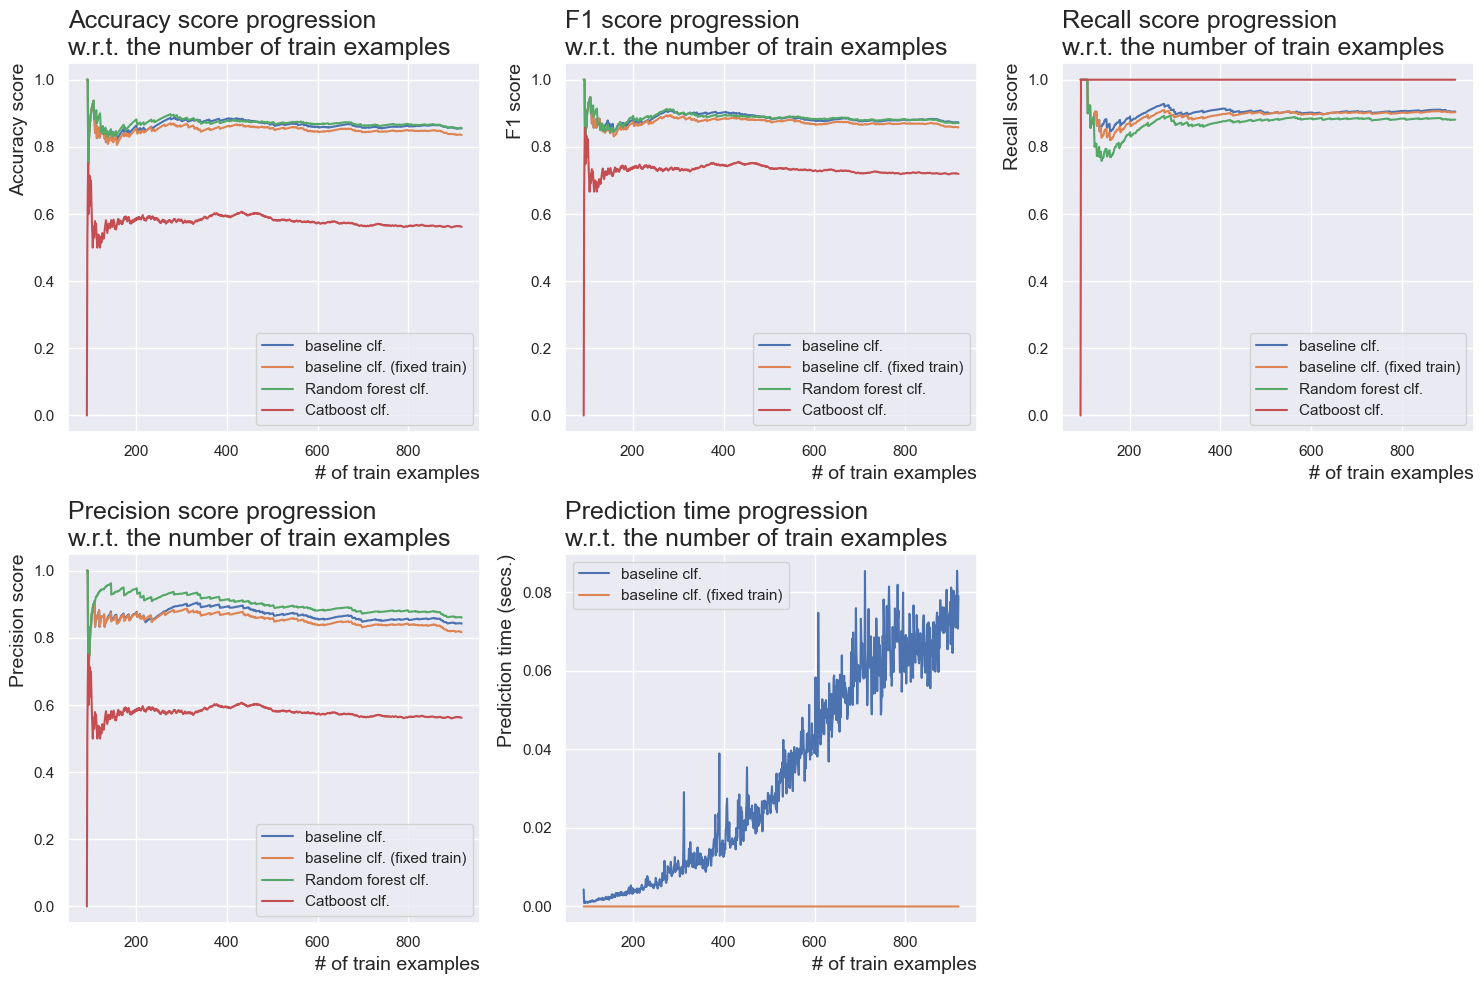

In [135]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = (1,1,1,1)  # Replace default "transparent" background of the figure with the "white" one


fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# First two plots are for prediction quality comparison
for ax, t in zip(axs[0],['accuracy_score', 'f1_score', "recall_score"]):
    ax.set_ylim(0-0.05, 1+0.05)
    ax.plot(range(n_train+1, len(X)), score_vals[t], label='baseline clf.')
    ax.plot(range(n_train+1, len(X)), score_vals[t+'_fixedtrain'], label='baseline clf. (fixed train)')
    ax.plot(range(n_train+1, len(X)), score_vals[t+'_rf'], label='Random forest clf.')
    ax.plot(range(n_train+1, len(X)), score_vals[t+'_catboost'], label='Catboost clf.')


for ax, t in zip(axs[1],['precision_score']):
    ax.set_ylim(0-0.05, 1+0.05)
    ax.plot(range(n_train+1, len(X)), score_vals[t], label='baseline clf.')
    ax.plot(range(n_train+1, len(X)), score_vals[t+'_fixedtrain'], label='baseline clf. (fixed train)')
    ax.plot(range(n_train+1, len(X)), score_vals[t+'_rf'], label='Random forest clf.')
    ax.plot(range(n_train+1, len(X)), score_vals[t+'_catboost'], label='Catboost clf.')



# The third plot is for prediction speed comparison
axs[1,1].plot(range(n_train, len(X)), t_preds, label='baseline clf.')
axs[1,1].plot(range(n_train, len(X)), t_preds_fixedtrain, label='baseline clf. (fixed train)')

# Add labels and titles to the plots
for (ax, t_verb, dim) in zip(axs.flatten(), ['Accuracy score', 'F1 score', 'Recall score', "Precision score", 'Prediction time'], ['','', '', '', '(secs.)']):
    ax.set_title('\n'.join([f"{t_verb} progression", "w.r.t. the number of train examples"]), loc='left', size=18)
    ax.set_xlabel('# of train examples', loc='right', size=14)
    ax.set_ylabel(f"{t_verb} {dim}".strip(), loc='top', size=14)
    ax.legend()

# Drop the predefined fourth plot since we do not use it
axs[1,2].set_axis_off()

# Some postprocessing of plots
plt.tight_layout()
plt.subplots_adjust()

plt.savefig('Classifier_comparison.png')
plt.show()

---

- бейзлайн моедьль хорошо работает и может конкурировать с моделью рендом форест и катбуст
- стоит отметить что на маленьких объемах трейнинг данных,бейзлайн модель выигрывает. Даже несмотря на тюнинг гиперпараметров модели класифаера у катбуст.

- Рекол показывает сколькко позицтивных лейблов совпали. А в нашей задаче, где мы хотим проверить риск какого то заболевания, мы хотим поймать максимальное количество позитивных овтетов, так как если сказать человеку что у него есть заболевание, чем нет, так как он может сделать напрмер доп обследование.


